In [22]:
# This codes are from https://towardsdatascience.com/another-twitter-sentiment-analysis-bb5b01ebad90

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("./training.1600000.processed.noemoticon.csv",header=None, names=cols, encoding="ISO-8859-1")
# above line will be different depending on where you saved your data, and your file name
df.head()

In [8]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [9]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [10]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [12]:
#df.sentiment == 4
# -> 이 결과 true or flase 값의 배열이 반환되는데 이를 다시 df[]에 집어넣으면 
# -> 아래와 같이 조건문의 결과가 true인 녀석만 뽑아낼 수 있다. 
df[df.sentiment ==4].head()

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone


In [18]:
#df에 새로운 열을 추가해주는 것도 아래와 같이 간단!
df['pre_clean_len']  =[len(t) for t in df.text]

In [20]:

data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}

from pprint import pprint
#pretty-print
pprint(data_dict)

{'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


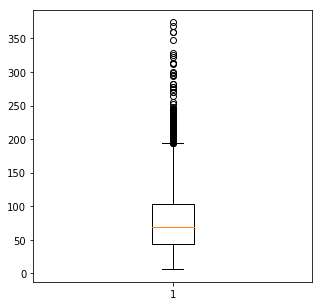

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
plt.boxplot(df.pre_clean_len)
plt.show()

#트위터에서 작성가능한 내용은 140자로 한정되어 있는데 왠일인지 140자 이상의 트윗들이 보인다.

In [24]:
df[df.pre_clean_len > 140].head()

,sentiment,text,pre_clean_len
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144


# Data Preparation1 : HTML decoding

In [25]:
# "It looks like HTML encoding has not been converted to text, 
# and ended up in text field as ‘&amp’,’&quot’,etc.
# Decoding HTML to general text will be my first step of data preparation. 
# I will use BeautifulSoup for this."
# from https://towardsdatascience.com/another-twitter-sentiment-analysis-bb5b01ebad90
df.text[279]

"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [30]:
# BeautifulSoup 라이브러리  
# 크롤러 만들 떄 사용하는 모양인데 html 돔을 제거하거나 html 인코딩을 텍스트로 바꿔줄 수 있다 봄.
# -> html parser

from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[279], 'lxml')
print(example1.get_text())

Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. 


# Data Preparatino2: @mention

In [32]:
df.text[343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [33]:
# re
# -> regular expression library

import re
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

# Data Preparation 3: URL links

In [35]:
df.text[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [36]:
re.sub('https?://[A-Za-z0-9./]+','',df.text[0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

# Data Preparation 4: UTF-8 BOM (Byte Order Mark)
#### “The UTF-8 BOM is a sequence of bytes (EF BB BF) that allows the reader to identify a file as being encoded in UTF-8.”

In [37]:
df.text[226]

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [70]:
df.text[226].replace(u"ï¿½", "?")

'Tuesday?ll start with reflection ?n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

# Data Preparation 5: hashtag / numbers

In [72]:
df.text[175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [75]:
re.sub(r'#[A-Za-z0-9]+','',df.text[175])

"@machineplay I'm so sorry you're having to go through this. Again.  "

In [83]:
df.text[24]

'blagh class at 8 tomorrow '

In [82]:
re.sub("[0-9]", "#", df.text[24])

'blagh class at # tomorrow '

'hello #nom'